<a href="https://colab.research.google.com/github/theysee/sberbank_reboot/blob/master/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%90%D1%80%D1%82%D0%B5%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Творческое задание
## Розничные покупки онлайн
**Сюжет: Промышленный шпионаж**

К вам в руки попал дамп базы продаж одного из крупных онлайн ретейлеров. Этот ретейлер является вашим конкурентом, и вы начали исследовать полученные данные.

**Требования**

0.   Скопируйте исходный ноутбук себе. В своём ноутбуке делаете задание
1.   Гуглить разрешается
2.   Убирайте ненужные вам клетки с кодом, и постарайтесь не отходить от логической структуры этого ноутбука
3.   Оформляйте графики так, чтобы они были читаемыми. Оформляйте легенду, заголовки, подписывайте оси в соответствующем масштабе и единицах измерения
4.   **Ваш ноутбук должен запускаться, и выполняться без ошибок сверху вниз. Иначе творческая работа оценивается в 0 баллов.**
5.   После того как вы сделали работу, нужно вызвать ctrl+s (сохранить ноутбук),
затем File->Download as .ipynb. Полученный файл нужно залить в форму опросника в соответствующей секции. В названии ноутбука не забудьте указать **имя и фамилию** в соответствующем месте


. 

Всего баллов 48.

### Шаг 1. Импортируйте нужные библиотеки. (1 балл)

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline

### Шаг 2. Загрузите данные в переменную online_rt (1 балл)
Замечание: если вы получаете ошибку декодирования, то передайте аргумент encoding='latin1' в pd.read_csv().

Файл расположен по адресу 'http://89.223.95.235/file/Online_Retail.csv'
его можно сразу передавать в функцию pd.read_csv

In [0]:
online_rt = pd.read_csv('http://89.223.95.235/file/Online_Retail.csv', encoding='latin1')

### Шаг 3. Удалите из выборки некорректные данные (2 балла)
Похоже, что у вашего конкурента не самая консистентная база данных, удалите некорректные строки из датафрейма

In [75]:
# Посмотрим, что за данные мы вообще получили.
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [76]:
# Посмотрим инфо о датасете.
online_rt.info()
# Видим значения NAN, поля с этими данными считаю некорректными.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [77]:
# Удаляем некорректные поля.
data = online_rt.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### Шаг 4.1. Отобразите столбчатую диаграмму с 10-ю странами в которых произошло наибольшее количество продаж в терминах количества (Quantity) (5 баллов)

In [79]:
# Найдём этот десяток стран и запишем в новый DF.
sales_quantity = data.groupby(['Country'])['Quantity'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)
sales_quantity
# Видим, что одна страна выбивается из общей массы.

,sum
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848
Australia,83653
Sweden,35637
Switzerland,29778
Spain,26824


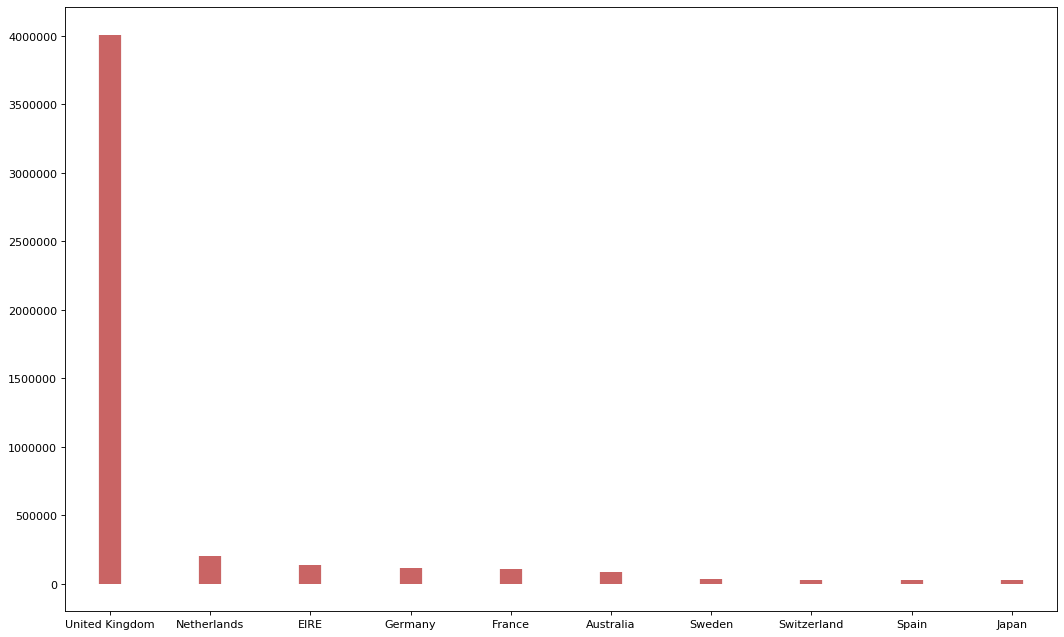

In [82]:
# Реализация Matplotlib.

sales_quantity.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=sales_quantity['Country'], ymin=0, ymax=sales_quantity['sum'], color='firebrick', alpha=0.7, linewidth=20)
plt.show()

In [81]:
# Реализация plotly. Библиотека бесплатная, при работа в оффлайне.
fig = px.bar(sales_quantity, x='Country', y='sum')
fig.show()

ValueError: ignored

### Шаг 4.2. Отобразите такую же диаграмму, но без Великобритании (1 балл)

In [0]:
# ваш код тут

### Шаг 5. Создаёте колонку выручки с каждой продажи (2 балла)

In [0]:
# ваш код тут

### Шаг 6.1. Отобразите график отображающий зависимость выручки от стоимости за единицу (для всего набора данных). (10 баллов)
График должен быть читаемым. Предлагается разбить UnitPrice на интервалы, в этом могут помочь функции np.arange() и pd.cut().

In [0]:
# ваш код тут

### Шаг 6.2 Какой вывод можно сделать из этого графика? (1 балл)

*Ваш комментарий:*

### Шаг 7.1. Создайте колонки day и month целочисленного типа. (5 баллов)
Подсказка: для начала определите в каком формате содержится InvoiceDate

In [0]:
# ваш код тут

### Шаг 7.2. Отобразите помесячную выручку для всех стран за 2011 год (по отдельности) в виде stacked barplot (10 баллов)

In [0]:
# ваш код тут

### Шаг 7.3. Отобразите такой же график, но без Великобритании (1 балл)

In [0]:
# ваш код тут

### Шаг 7.4. Какой вывод можно сделать из этих графиков? (1 балл)

*Ваш комментарий:*

### Шаг 8.1. Отобразите для Нидерландов график дневной выручки в Ноябре 2011. (5 баллов)

In [0]:
# ваш код тут

### Шаг 8.2. В какой день выручка максимальная? (2 балла)

In [0]:
# ваш код тут